In [ ]:
# https://www.kaggle.com/code/milan400/machine-learning-algorithms-from-scratch

## Linear Regression

MSE: 305.7719958301902


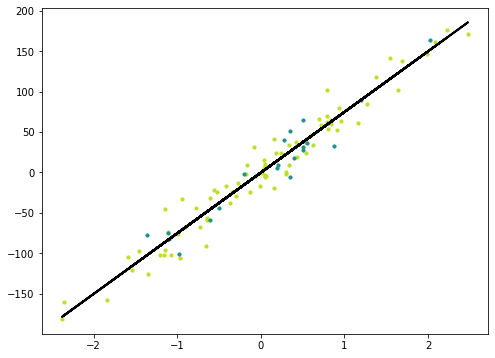

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy.random import randn
import random
from IPython.core.display import display,Image
from string import Template
import IPython.display
import warnings

class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)



X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
    
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

y_pred_line = regressor.predict(X)




cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()


MSE: 305.7741316228642


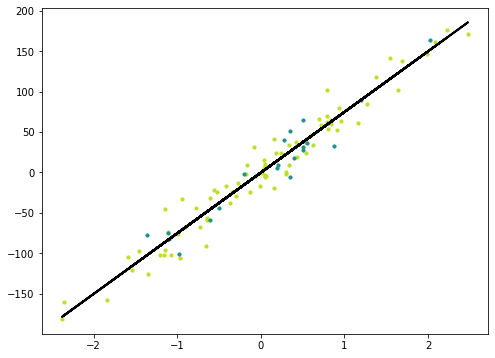

In [3]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

y_pred_line_sk = regressor.predict(X)

cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line_sk, color='black', linewidth=2, label="Prediction")
plt.show()

## Logistic Regression

In [5]:
class logisticRegression:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)

      self.weights -= self.lr *dw
      self.bias -= self.lr * db 

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))

#Test Logistic regression in breast_cancer
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

regressor = logisticRegression(lr=0.0001,n_iters=1000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

print("Accuracy: ",accuracy(y_test, predictions))

Accuracy:  0.9298245614035088


## Decision Tree

In [6]:
from collections import Counter

def entropy(y):
  hist = np.bincount(y)
  ps = hist/len(y)
  return(-np.sum([p * np.log2(p) for p in ps if p>0]))



class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value
  
  def is_leaf_node(self):
    return(self.value is not None)


class DecisionTree:
  def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.root = None

  def fit(self, X, y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X, y)

  def _grow_tree(self, X, y, depth=0):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y))

    #stopping criteria
    if(depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
      leaf_value = self._most_common_label(y)
      return(Node(value=leaf_value))
    
    feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

    #greedy search
    best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

    left_idxs, right_idxs = self._split(X[:,best_feat],best_thresh)

    left = self._grow_tree(X[left_idxs,:], y[left_idxs], depth+1)
    right = self._grow_tree(X[right_idxs,:], y[right_idxs], depth+1)
    return(Node(best_feat, best_thresh, left, right))
  

  def _best_criteria(self, X, y, feat_idxs):
    best_gain = -1
    split_idx, split_thresh = None, None
    for feat_idx in feat_idxs:
      X_column = X[:, feat_idx]
      thresholds = np.unique(X_column)
      for threshold in thresholds:
        gain = self._information_gain(y, X_column, threshold)
        if(gain>best_gain):
          best_gain = gain
          split_idx = feat_idx
          split_thresh = threshold
    return(split_idx, split_thresh)

  def _information_gain(self, y, X_column, split_threh):
    #parent entropy
    parent_entropy = entropy(y)

    #generate split
    left_idxs, right_idxs = self._split(X_column, split_threh)
    if(len(left_idxs == 0) or len(right_idxs)==0):
      return 0

    #weighted avg vhild entropy
    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
    child_entropy = (n_l/n)*e_l + (n_r/n)*e_r

    #return ig
    ig = parent_entropy - child_entropy

    return ig
  
  def _split(self, X_column, split_threh):
    left_idxs = np.argwhere(X_column <= split_threh).flatten()
    right_idxs = np.argwhere(X_column > split_threh).flatten()
    return(left_idxs, right_idxs)
  
  def predict(self, X):
    #traverse tree
    return(np.array([self._traverse_tree(x, self.root) for x in X]))

  def _traverse_tree(self, x, node):
    if(node.is_leaf_node()):
      return(node.value)

    if(x[node.feature] <= node.threshold):
      return(self._traverse_tree(x, node.left))
    return(self._traverse_tree(x, node.right))

  def _most_common_label(self, y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return(most_common)

#decision tree test


def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return(accuracy)



data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)



clf = DecisionTree(max_depth=20)
clf.fit(X_train, y_train)



y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ",acc)

Accuracy:  0.6228070175438597


<AxesSubplot:>

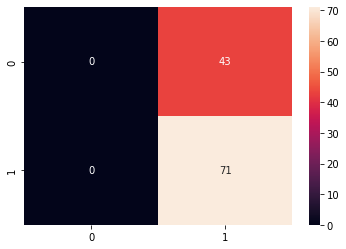

In [7]:
cnf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

## Random Forest

In [8]:
def bootstrap_sample(X, y):
  n_samples = X.shape[0]
  idxs = np.random.choice(n_samples, size = n_samples, replace=True)
  return(X[idxs], y[idxs])

def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0]
  return(most_common)

class RandomForest:
  def __init__(self, n_trees = 100, min_samples_split=2, max_depth=100, n_feats=None):
    self.n_trees = n_trees
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.trees = []

  def fit(self, X, y):
    self.trees = []
    for _ in range(self.n_trees):
      tree = DecisionTree(min_samples_split = self.min_samples_split, max_depth=self.max_depth, n_feats=self.n_feats)
      X_sample, y_sample = bootstrap_sample(X, y)
      tree.fit(X_sample, y_sample)
      self.trees.append(tree)
  def predict(self, X):
    tree_preds = np.array([tree.predict(X) for tree in self.trees])
    tree_preds = np.swapaxes(tree_preds, 0, 1)

    y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
    return np.array(y_pred)


clf_f = RandomForest(n_trees=3)
clf_f.fit(X_train, y_train)

y_pred = clf_f.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ",acc)

Accuracy:  0.6578947368421053


## SVM

[-0.20334488  0.34762713 -0.05190083] -1.0459999999999956


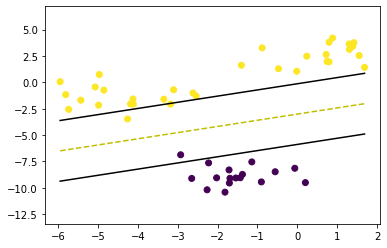

In [9]:
class SVM:
  def __init__(self, learning_rate = 0.001, lambda_param=0.01, n_iters=1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    y_ = np.where(y<=0,-1,1)
    n_samples, n_features = X.shape

    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >=1
        if condition:
          self.w -= self.lr * (2*self.lambda_param * self.w)
        else:
          self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
          self.b -= self.lr * y_[idx]
  
  def predict(self, X):
    linear_output = np.dot(X, self.w) - self.b
    return(np.sign(linear_output))

X, y =  datasets.make_blobs(n_samples=50, n_features=3, centers=3, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
predictions = clf.predict(X)
 
print(clf.w, clf.b)

def visualize_svm():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X[:,0], X[:,1], marker='o',c=y)

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
     x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()

<AxesSubplot:>

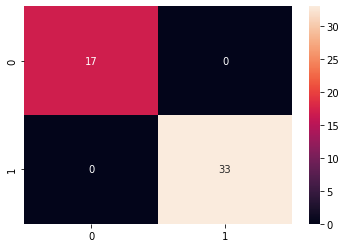

In [10]:
cnf_matrix = confusion_matrix(y, predictions)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

## NN

In [11]:
class NeuralNetwork():
    
    def __init__(self):
        np.random.seed(1)
        self.synaptic_weights = 2*np.random.random((3,1)) - 1
    
    def sigmoid(self,x):
        return(1/(1+np.exp(-x)))
    
    def sigmoid_derivative(self,x):
        return(x/(1+x))
    
    def train(self,training_inputs, training_outputs,training_iterations):
        for itr in range(training_iterations):
            
            output = self.think(training_inputs)
            error = training_outputs - output
            adjustments = np.dot(training_inputs.T,error*self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments
    
    def think(self,inputs):
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs,self.synaptic_weights))
        return output
    
    


#In short, use this ' if name == "main" ' block to prevent (certain) code from being run when the module
#is imported. Put simply, name is a variable defined for each script that defines whether the script is 
#being run as the main module or it is being run as an imported module.



if(__name__ == "__main__"):
    neural_network = NeuralNetwork()
    
    print("Rnadom synaptic weights: ")
    print(neural_network.synaptic_weights)
    
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])
    training_outputs = np.array([[0,1,1,0]]).T
    
    neural_network.train(training_inputs,training_outputs,10000)
    
    print("Synaptic weights after training: ")
    print(neural_network.synaptic_weights)
    
    #A = str(input('Input 1: '))
    #B = str(input('Input 2: '))
    #C = str(input('Input 3: '))
    A = 0
    B = 1
    C = 1
    print("New situation: input data = ", A, B, C)
    print("Output data: ")
    print(neural_network.think(np.array([A,B,C])))


Rnadom synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Synaptic weights after training: 
[[13.38883717]
 [-0.18998542]
 [-4.49621121]]
New situation: input data =  0 1 1
Output data: 
[0.00913743]
